Input: {'packet_size': 2637, 'duration': 18.59642915561709, 'protocol_code': 1, 'network_code': 1} => Predicted: reel
Input: {'packet_size': 915, 'duration': 6.782297125730812, 'protocol_code': 0, 'network_code': 1} => Predicted: non-reel
Input: {'packet_size': 2414, 'duration': 11.620968581344753, 'protocol_code': 1, 'network_code': 2} => Predicted: reel
Input: {'packet_size': 1086, 'duration': 16.467437306504888, 'protocol_code': 0, 'network_code': 1} => Predicted: reel
Input: {'packet_size': 2646, 'duration': 16.03791122843432, 'protocol_code': 0, 'network_code': 1} => Predicted: reel
Input: {'packet_size': 826, 'duration': 14.917685966034075, 'protocol_code': 1, 'network_code': 2} => Predicted: reel
Input: {'packet_size': 1107, 'duration': 1.0255450765911491, 'protocol_code': 1, 'network_code': 0} => Predicted: non-reel
Input: {'packet_size': 2349, 'duration': 5.281641777896453, 'protocol_code': 0, 'network_code': 0} => Predicted: reel
Input: {'packet_size': 2780, 'duration': 18.79

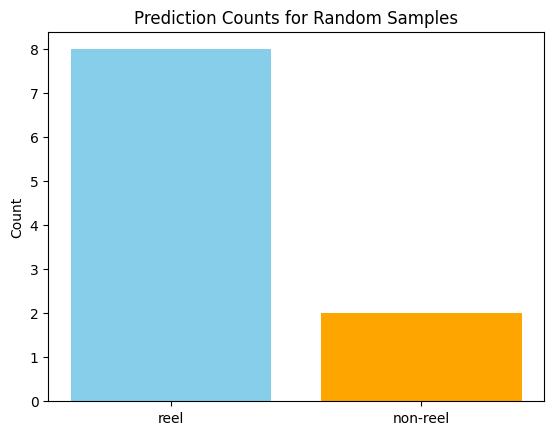

In [1]:
import sys
import os
sys.path.append(os.path.abspath('../src'))

import random
import matplotlib.pyplot as plt
from collections import Counter
from predict_utils import load_model, predict_samples

model = load_model('../src/reel_detector_model.pkl')

protocol_lookup = {'TCP': 0, 'HTTP': 1, 'UDP': 2}
network_lookup = {'good': 0, 'medium': 1, 'poor': 2}

test_samples = []
num_samples = 10
for _ in range(num_samples):
    sample = {
        'packet_size': random.randint(400, 3000),
        'duration': random.uniform(1.0, 20.0),
        'protocol_code': random.choice(list(protocol_lookup.values())),
        'network_code': random.choice(list(network_lookup.values()))
    }
    test_samples.append(sample)

results = predict_samples(model, test_samples)

for sample, label in zip(test_samples, results):
    print(f"Input: {sample} => Predicted: {label}")

label_counts = Counter(results)
plt.bar(label_counts.keys(), label_counts.values(), color=['skyblue', 'orange'])
plt.ylabel('Count')
plt.title('Prediction Counts for Random Samples')
plt.show()
